In [8]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [9]:
DATASET_NAME = Targets.Distributive
generalisation_mode = GeneralisationModes.weak
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [10]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [11]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [12]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 1., 2., 3.], dtype=float32), array([12038,   899,   596,  6729]))
[9.9940866e-01 3.8522895e-04]


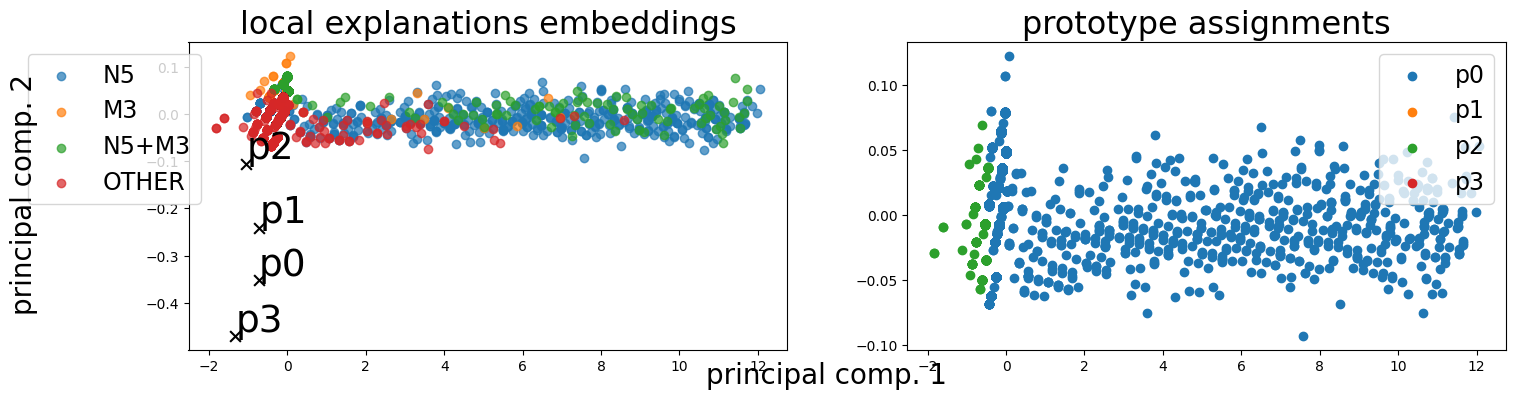

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 0.560885 +- 0.036160
Concept distribution:  (array([0, 2]), array([19898,   364]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.12068, LEN: 0.090080, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.11008, V. LEN 0.077
  2: Loss: 0.07305, LEN: 0.065446, Acc: 0.64, V. Acc: 0.98, V. Loss: 0.06995, V. LEN 0.049
  3: Loss: 0.04250, LEN: 0.037654, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.03785, V. LEN 0.019
  4: Loss: 0.02239, LEN: 0.018944, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.02887, V. LEN 0.016
  5: Loss: 0.01978, LEN: 0.017238, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.02791, V. LEN 0.015
  6: Loss: 0.01907, LEN: 0.017012, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.02258, V. LEN 0.014
  7: Loss: 0.01852, LEN: 0.016780, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.02301, V. LEN 0.015
  8: Loss: 0.01797, LEN: 0.016600, Acc: 0.98, V. Acc: 0

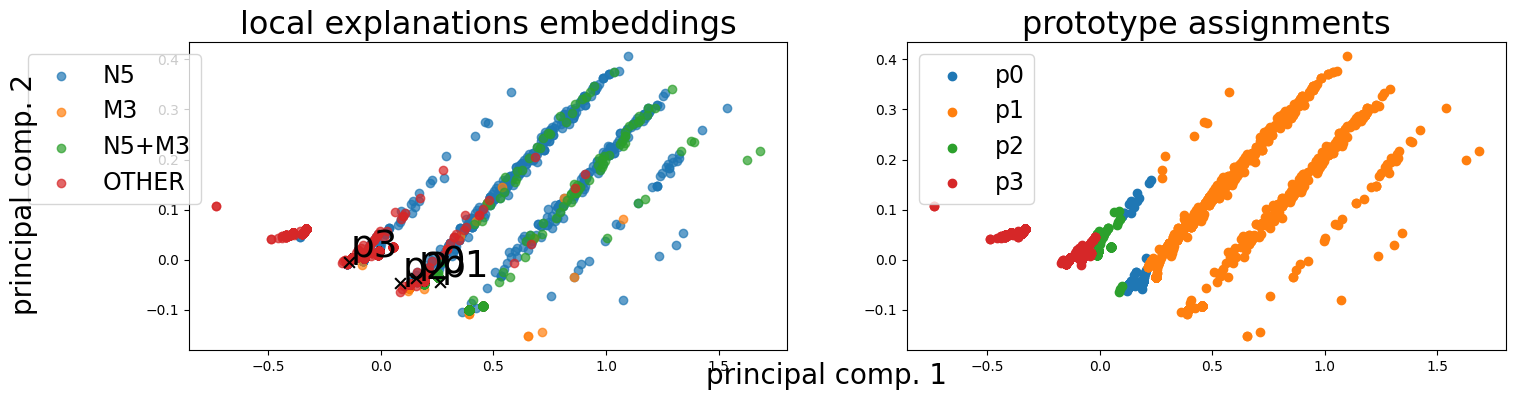

Alpha norms:
tensor([[0.1045, 1.0000, 0.0439, 0.0133],
        [0.1556, 1.0000, 0.0419, 0.0192]])
Concept Purity: 0.623538 +- 0.108539
Concept distribution:  (array([0, 1, 2, 3]), array([ 4709,  1250,  1994, 12309]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9754)

 20: Loss: 0.00953, LEN: 0.009278, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.03371, V. LEN 0.034
 21: Loss: 0.00898, LEN: 0.008710, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.00688, V. LEN 0.006
 22: Loss: 0.00797, LEN: 0.007768, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.04539, V. LEN 0.045
 23: Loss: 0.00807, LEN: 0.007864, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.00931, V. LEN 0.009
 24: Loss: 0.00833, LEN: 0.008115, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.02528, V. LEN 0.025
 25: Loss: 0.00772, LEN: 0.007520, Acc: 0.97, V. Acc: 0.77, V. Loss: 0.02765, V. LEN 0.027
 26: Loss: 0.00747, LEN: 0.007280, Acc: 0.98, V. Acc: 0.77, V. Loss: 0.02951, V. LEN 0.029
 27: Loss: 0.00735, LEN: 0.007

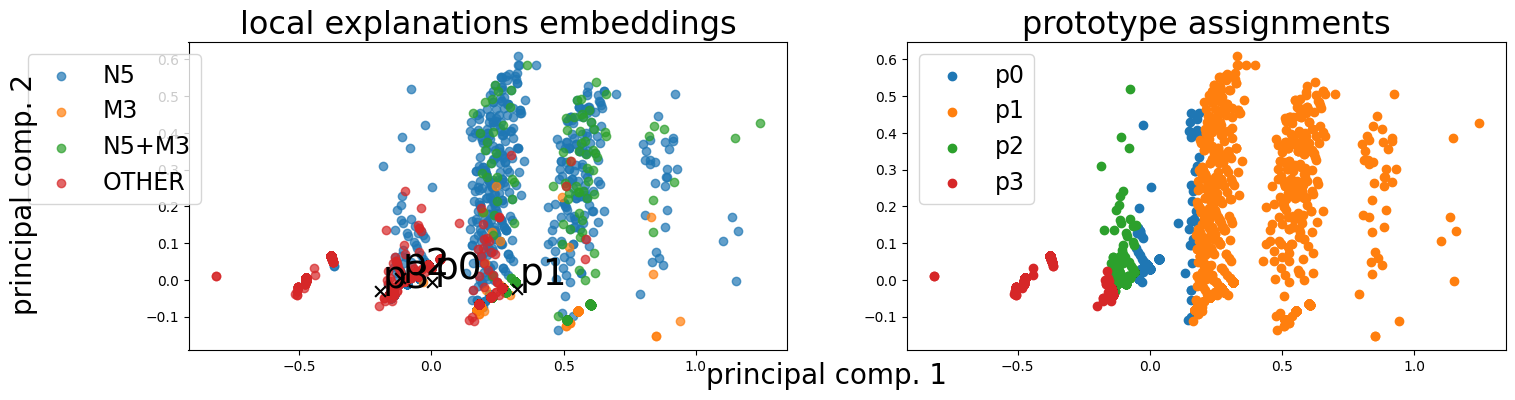

Alpha norms:
tensor([[0.0620, 1.0000, 0.0100, 0.0054],
        [0.0663, 1.0000, 0.0037, 0.0067]])
Concept Purity: 0.672042 +- 0.049723
Concept distribution:  (array([0, 1, 2, 3]), array([2269, 5905, 6884, 5204]))
Logic formulas:
For class 0:
0.7677804649326292 (feature0000000000) | (feature0000000002) | (feature0000000001)
For class 1:
0.7677804649326292 (feature0000000003)
Accuracy as classifier:  0.7678
LEN fidelity:  tensor(0.7678)

 40: Loss: 0.00690, LEN: 0.006704, Acc: 0.98, V. Acc: 0.77, V. Loss: 0.03100, V. LEN 0.031
 41: Loss: 0.00663, LEN: 0.006453, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.00956, V. LEN 0.009
 42: Loss: 0.00743, LEN: 0.007264, Acc: 0.98, V. Acc: 0.77, V. Loss: 0.03173, V. LEN 0.032
 43: Loss: 0.00737, LEN: 0.007178, Acc: 0.98, V. Acc: 0.62, V. Loss: 0.04653, V. LEN 0.046
 44: Loss: 0.00654, LEN: 0.006347, Acc: 0.98, V. Acc: 0.98, V. Loss: 0.00950, V. LEN 0.009
 45: Loss: 0.00679, LEN: 0.006588, Acc: 0.98, V. Acc: 0.77, V. Loss: 0.03394, V. LEN 0.033
 46: Loss: 0.0

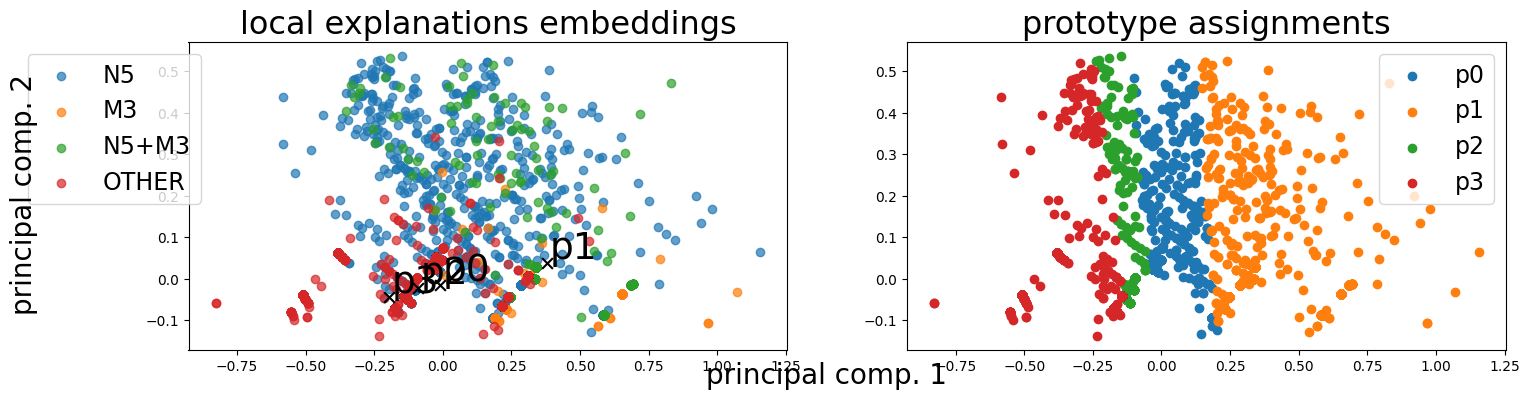

Alpha norms:
tensor([[0.0539, 1.0000, 0.0097, 0.0076],
        [0.0484, 1.0000, 0.0032, 0.0076]])
Concept Purity: 0.668137 +- 0.060724
Concept distribution:  (array([0, 1, 2, 3]), array([6606, 5392, 3118, 5146]))
Logic formulas:
For class 0:
0.7700508365825971 (feature0000000000) | (feature0000000002) | (feature0000000001)
For class 1:
0.7700508365825971 (feature0000000003)
Accuracy as classifier:  0.7701
LEN fidelity:  tensor(0.7701)

 60: Loss: 0.00624, LEN: 0.005996, Acc: 0.99, V. Acc: 0.77, V. Loss: 0.04484, V. LEN 0.045
 61: Loss: 0.00601, LEN: 0.005797, Acc: 0.99, V. Acc: 0.60, V. Loss: 0.07693, V. LEN 0.076
 62: Loss: 0.00604, LEN: 0.005826, Acc: 0.99, V. Acc: 0.98, V. Loss: 0.01177, V. LEN 0.011
 63: Loss: 0.00575, LEN: 0.005503, Acc: 0.99, V. Acc: 0.76, V. Loss: 0.05280, V. LEN 0.052
 64: Loss: 0.00655, LEN: 0.006271, Acc: 0.99, V. Acc: 0.97, V. Loss: 0.01571, V. LEN 0.015
 65: Loss: 0.00565, LEN: 0.005444, Acc: 0.99, V. Acc: 0.62, V. Loss: 0.07487, V. LEN 0.074
 66: Loss: 0.0

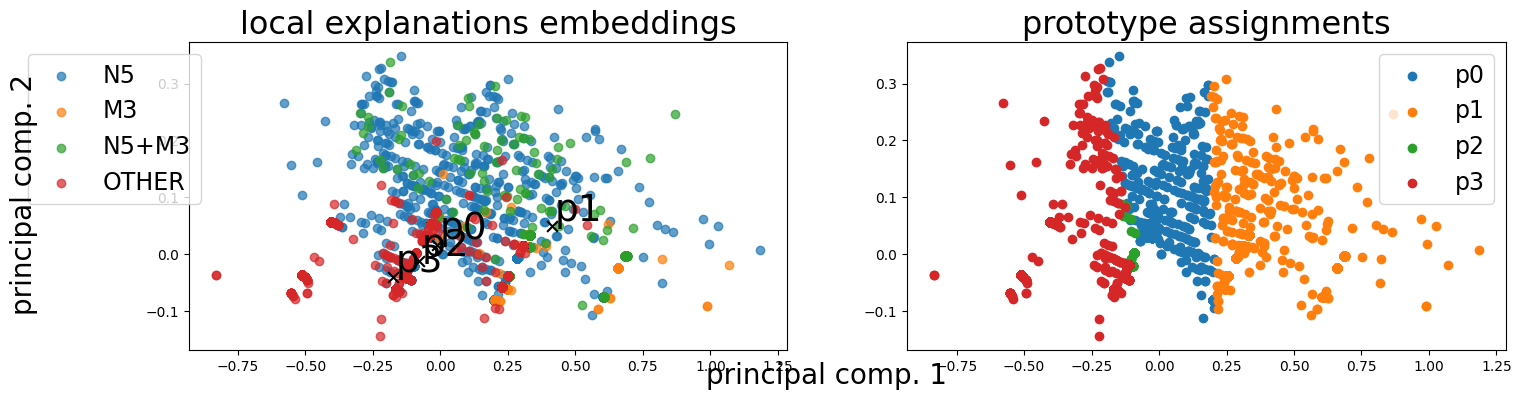

Alpha norms:
tensor([[0.0632, 1.0000, 0.0115, 0.0103],
        [0.0621, 1.0000, 0.0042, 0.0110]])
Concept Purity: 0.653359 +- 0.096566
Concept distribution:  (array([0, 1, 2, 3]), array([6686, 5378,  146, 8052]))
Logic formulas:
For class 0:
0.6272148462563546 (feature0000000000) | (feature0000000001) | (feature0000000002)
For class 1:
0.6272148462563546 (feature0000000003)
Accuracy as classifier:  0.6272
LEN fidelity:  tensor(0.6272)

 80: Loss: 0.00571, LEN: 0.005456, Acc: 0.99, V. Acc: 0.62, V. Loss: 0.07949, V. LEN 0.079
 81: Loss: 0.00566, LEN: 0.005412, Acc: 0.99, V. Acc: 0.61, V. Loss: 0.09295, V. LEN 0.092
 82: Loss: 0.00588, LEN: 0.005619, Acc: 0.99, V. Acc: 0.77, V. Loss: 0.05266, V. LEN 0.052
 83: Loss: 0.00560, LEN: 0.005378, Acc: 0.99, V. Acc: 0.92, V. Loss: 0.02397, V. LEN 0.024
 84: Loss: 0.00558, LEN: 0.005343, Acc: 0.99, V. Acc: 0.98, V. Loss: 0.00864, V. LEN 0.008
 85: Loss: 0.00546, LEN: 0.005202, Acc: 0.99, V. Acc: 0.93, V. Loss: 0.02340, V. LEN 0.023
 86: Loss: 0.0

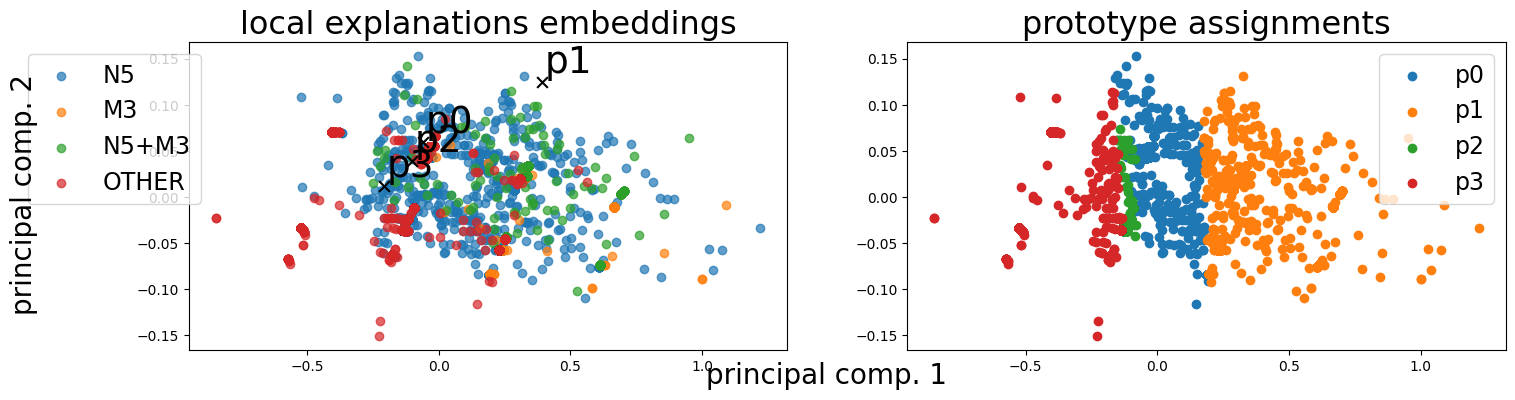

Alpha norms:
tensor([[0.0748, 1.0000, 0.0119, 0.0135],
        [0.0688, 1.0000, 0.0045, 0.0128]])
Concept Purity: 0.668506 +- 0.060549
Concept distribution:  (array([0, 1, 2, 3]), array([6538, 5527, 3054, 5143]))
Logic formulas:
For class 0:
0.7701989042988994 (feature0000000000) | ((feature0000000002) | (feature0000000001)
For class 1:
0.7701989042988994 (feature0000000003)
Accuracy as classifier:  0.7702
LEN fidelity:  tensor(0.7702)

100: Loss: 0.00548, LEN: 0.005266, Acc: 0.99, V. Acc: 0.77, V. Loss: 0.05777, V. LEN 0.057
101: Loss: 0.00528, LEN: 0.005020, Acc: 0.99, V. Acc: 0.62, V. Loss: 0.09393, V. LEN 0.093
102: Loss: 0.00556, LEN: 0.005313, Acc: 0.99, V. Acc: 0.61, V. Loss: 0.09070, V. LEN 0.090
103: Loss: 0.00519, LEN: 0.004948, Acc: 0.99, V. Acc: 0.93, V. Loss: 0.02446, V. LEN 0.024
104: Loss: 0.00486, LEN: 0.004631, Acc: 0.99, V. Acc: 0.61, V. Loss: 0.10083, V. LEN 0.100
105: Loss: 0.00539, LEN: 0.005119, Acc: 0.99, V. Acc: 0.93, V. Loss: 0.02612, V. LEN 0.026
106: Loss: 0.

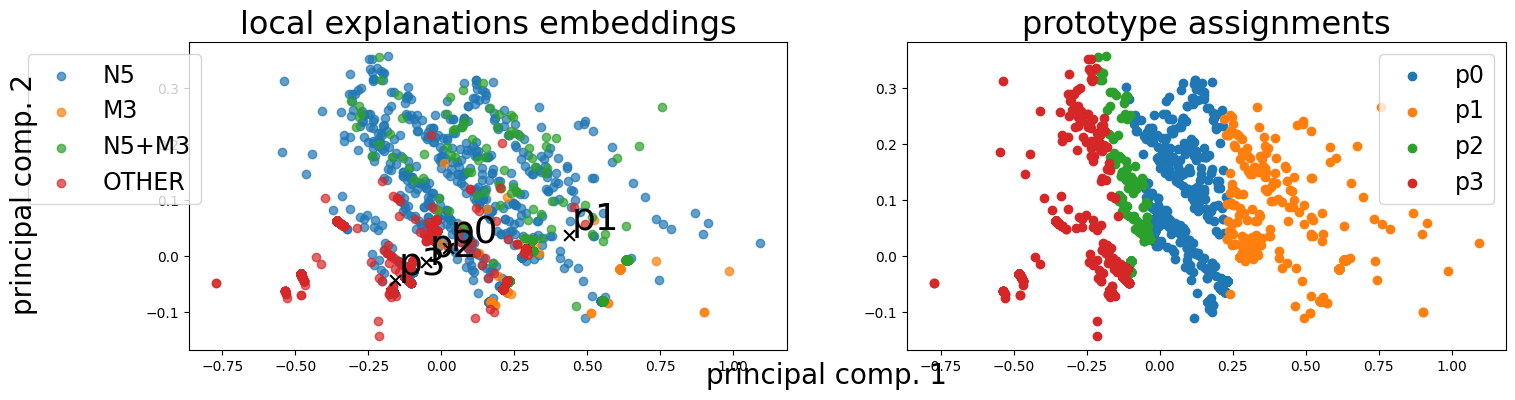

Alpha norms:
tensor([[0.0612, 1.0000, 0.0104, 0.0135],
        [0.0541, 1.0000, 0.0042, 0.0120]])
Concept Purity: 0.613013 +- 0.073330
Concept distribution:  (array([0, 1, 2, 3]), array([4202, 3473, 4541, 8046]))
Logic formulas:
For class 0:
0.6275109816889591 (feature0000000000) | ((feature0000000002) | (feature0000000001)
For class 1:
0.6275109816889591 (feature0000000003)
Accuracy as classifier:  0.6275
LEN fidelity:  tensor(0.6275)

120: Loss: 0.00491, LEN: 0.004693, Acc: 0.99, V. Acc: 0.62, V. Loss: 0.10316, V. LEN 0.103
121: Loss: 0.00588, LEN: 0.005651, Acc: 0.99, V. Acc: 0.97, V. Loss: 0.01548, V. LEN 0.015
122: Loss: 0.00528, LEN: 0.005066, Acc: 0.99, V. Acc: 0.62, V. Loss: 0.09332, V. LEN 0.093
Early Stopping
Loading model at epoch 21
Model not loaded
Best epoch: 21
Trained lasted for 345 seconds
(array([0., 1., 2., 3.], dtype=float32), array([3040,  217,  141, 1673]))
[0.9444201  0.05288995]


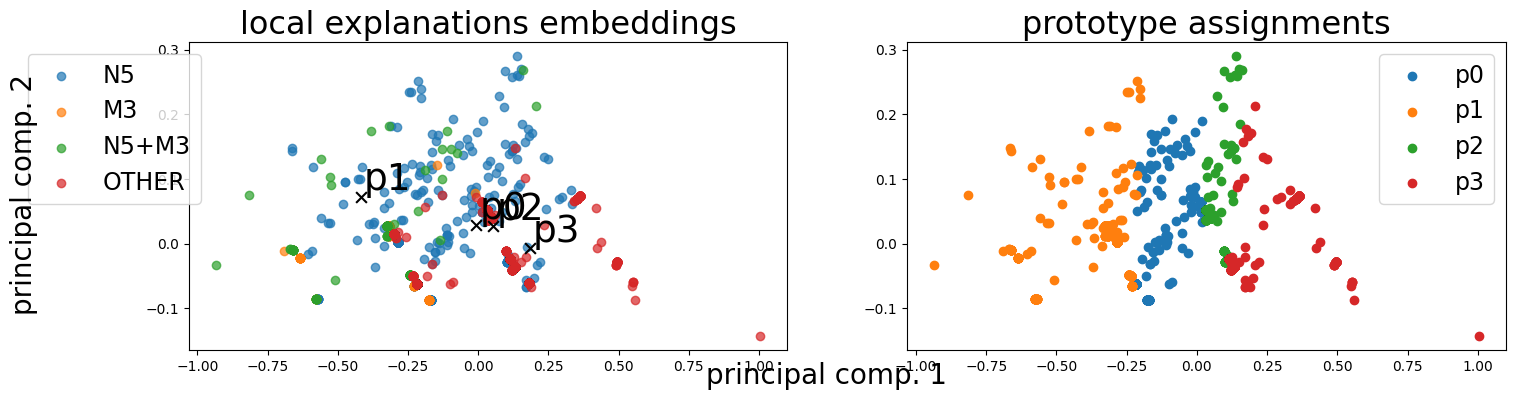

Alpha norms:
tensor([[0.0591, 1.0000, 0.0101, 0.0111],
        [0.0530, 1.0000, 0.0041, 0.0103]])
Concept Purity: 0.612605 +- 0.041578
Concept distribution:  (array([0, 1, 2, 3]), array([ 476,  972, 1595, 2028]))
Logic formulas:
For class 0:
0.6199211045364892 (feature0000000001) | ((feature0000000002) | (feature0000000000)
For class 1:
0.6199211045364892 (feature0000000003)
Accuracy as classifier:  0.6199
LEN fidelity:  tensor(0.6199)


In [13]:
expl.iterate(train_group_loader, test_group_loader, plot=True)
expl.inspect(test_group_loader)

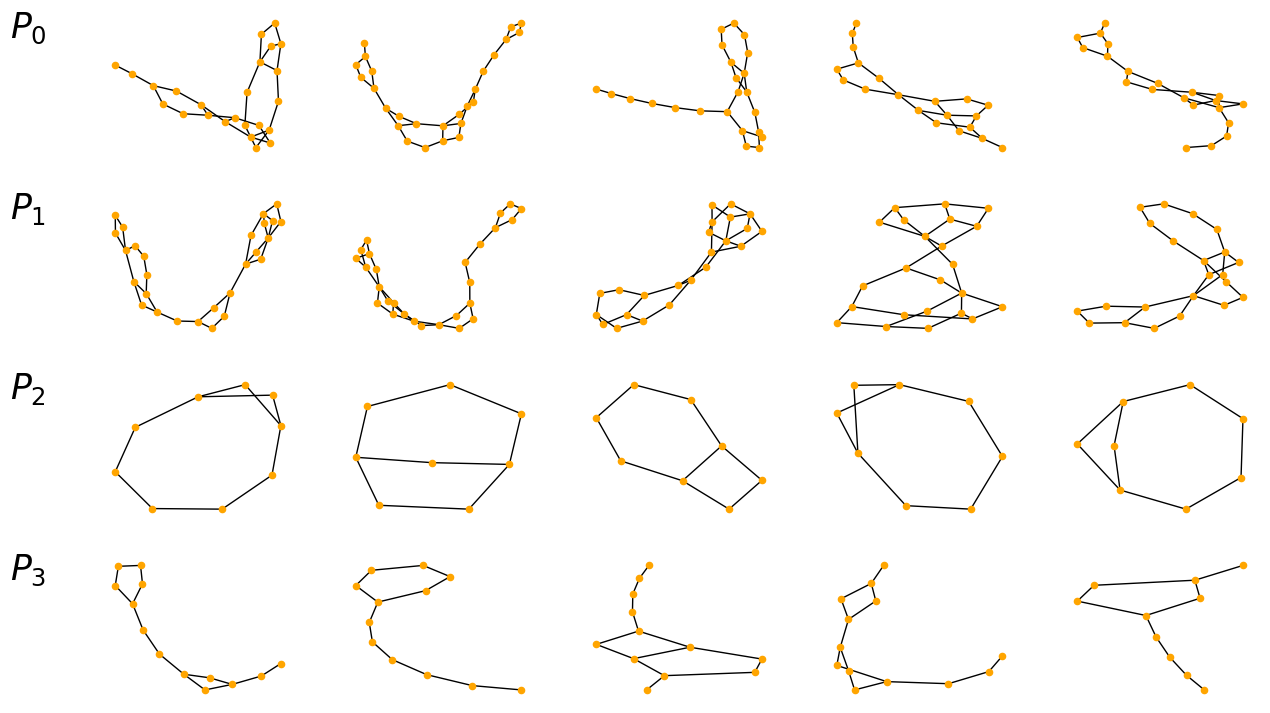

In [14]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()